In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests
import folium
from sklearn.cluster import KMeans

# Final Project
In this project, first we are going to find the postal code from a page on google. Then we are going to find the latitude and longitudes of each postal code. Then using foursquare API I am going to find out all the places within 600 meter distance and also their longitude and latitude values. Then I found the total number of places in a particular area. Then based on that I find out which place is the best to visit in Ahmedabad.

In [19]:
url = 'https://www.indiatvnews.com/pincode/gujarat/ahmedabad/'
dfs = pd.read_html(url)

In [20]:
df = dfs[0]
df

Office           Taluk   District    State  Pincode
0      Ambawadi Ahmedabad  Ahmadabad City  Ahmedabad  GUJARAT   380006
1                   Ambli         Daskroi  Ahmedabad  GUJARAT   380058
2               Amraiwadi  Ahmadabad City  Ahmedabad  GUJARAT   380026
3    Anandnagar Ahmedabad  Ahmadabad City  Ahmedabad  GUJARAT   380007
4           Asarwa Chakla  Ahmadabad City  Ahmedabad  GUJARAT   380016
..                    ...             ...        ...      ...      ...
506              Zanzarka       Dhandhuka  Ahmedabad  GUJARAT   382460
507              Zanzarva          Mandal  Ahmedabad  GUJARAT   382120
508                 Zezra        Viramgam  Ahmedabad  GUJARAT   382150
509                Zinzar       Dhandhuka  Ahmedabad  GUJARAT   382250
510               Ambalia             NaN  Ahmedabad  GUJARAT   383345

[511 rows x 5 columns]

In [21]:
df1 = df.loc[0:101]
df2 = df.loc[101:202]
df3 = df.loc[202:303]
df4 = df.loc[303:404]
df5 = df.loc[404:510]


In [22]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df1.iterrows():
    address = str(row['Taluk']) + ', Ahmedabad'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df1.loc[index, 'Latitude'] = latitude
        df1.loc[index, 'Longitude'] = longitude
    except AttributeError:
        to_drop_unknown.append(index)
df1.drop(to_drop_unknown, inplace=True)
df1

c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\preet\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

Office           Taluk   District    State  Pincode  \
0       Ambawadi Ahmedabad  Ahmadabad City  Ahmedabad  GUJARAT   380006   
1                    Ambli         Daskroi  Ahmedabad  GUJARAT   380058   
2                Amraiwadi  Ahmadabad City  Ahmedabad  GUJARAT   380026   
3     Anandnagar Ahmedabad  Ahmadabad City  Ahmedabad  GUJARAT   380007   
4            Asarwa Chakla  Ahmadabad City  Ahmedabad  GUJARAT   380016   
..                     ...             ...        ...      ...      ...   
97                Muktipur         Daskroi  Ahmedabad  GUJARAT   382425   
98   Municipal Corporation  Ahmadabad City  Ahmedabad  GUJARAT   380001   
99              N C Market  Ahmadabad City  Ahmedabad  GUJARAT   380002   
100              N C Mills  Ahmadabad City  Ahmedabad  GUJARAT   382345   
101           Nana Chiloda  Ahmadabad City  Ahmedabad  GUJARAT   382330   

      Latitude  Longitude  
0    23.021624  72.579707  
1    22.958407  72.718524  
2    23.021624  72.579707  
3    23.021624  72.579707  
4    23.021624  72.579707  
..         ...        ...  
97   22.958407  72.718524  
98   23.021624  72.579707  
99   23.021624  72.579707  
100  23.021624  72.579707  
101  23.021624  72.579707  

[86 rows x 7 columns]

In [23]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df2.iterrows():
    address = str(row['Taluk']) + ', Ahmedabad'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df2.loc[index, 'Latitude'] = latitude
        df2.loc[index, 'Longitude'] = longitude
    except AttributeError:
        to_drop_unknown.append(index)
df2.drop(to_drop_unknown, inplace=True)
df2

c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\preet\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

Office           Taluk   District    State  Pincode  \
101       Nana Chiloda  Ahmadabad City  Ahmedabad  GUJARAT   382330   
102             Nandej         Daskroi  Ahmedabad  GUJARAT   382435   
103   Naranpura Vistar  Ahmadabad City  Ahmedabad  GUJARAT   380013   
104       Narayannagar  Ahmadabad City  Ahmedabad  GUJARAT   380007   
105         Naroda I E       Ahmedabad  Ahmedabad  GUJARAT   382330   
..                 ...             ...        ...      ...      ...   
198          Bavaliary       Dhandhuka  Ahmedabad  GUJARAT   382455   
199  Bavla Market Yard           Bavla  Ahmedabad  GUJARAT   382220   
200              Bavla           Bavla  Ahmedabad  GUJARAT   382220   
201             Bhadaj         Daskroi  Ahmedabad  GUJARAT   380060   
202            Bhadana        Viramgam  Ahmedabad  GUJARAT   382140   

      Latitude  Longitude  
101  23.021624  72.579707  
102  22.958407  72.718524  
103  23.021624  72.579707  
104  23.021624  72.579707  
105  23.021624  72.579707  
..         ...        ...  
198  22.381636  71.979141  
199  22.827886  72.368474  
200  22.827886  72.368474  
201  22.958407  72.718524  
202  23.122452  72.048395  

[99 rows x 7 columns]

In [24]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df3.iterrows():
    address = str(row['Taluk']) + ', Ahmedabad'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df3.loc[index, 'Latitude'] = latitude
        df3.loc[index, 'Longitude'] = longitude
    except AttributeError:
        to_drop_unknown.append(index)
df3.drop(to_drop_unknown, inplace=True)
df3

c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\preet\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

Office           Taluk   District    State  Pincode   Latitude  \
202     Bhadana        Viramgam  Ahmedabad  GUJARAT   382140  23.122452   
203     Bhadiad       Dhandhuka  Ahmedabad  GUJARAT   382463  22.381636   
204    Bhangadh       Dhandhuka  Ahmedabad  GUJARAT   382455  22.381636   
205    Bhankoda  Detroj-rampura  Ahmedabad  GUJARAT   382140  23.340036   
206      Bhayla           Bavla  Ahmedabad  GUJARAT   382220  22.827886   
..          ...             ...        ...      ...      ...        ...   
299     Jawaraj          Dholka  Ahmedabad  GUJARAT   382230  22.726607   
300       Jeska       Dhandhuka  Ahmedabad  GUJARAT   382250  22.381636   
301    Jholapur          Sanand  Ahmedabad  GUJARAT   382170  23.023888   
302   Joshipura        Viramgam  Ahmedabad  GUJARAT   382150  23.122452   
303  Junapadhar        Viramgam  Ahmedabad  GUJARAT   382150  23.122452   

     Longitude  
202  72.048395  
203  71.979141  
204  71.979141  
205  72.184436  
206  72.368474  
..         ...  
299  72.441186  
300  71.979141  
301  72.385148  
302  72.048395  
303  72.048395  

[100 rows x 7 columns]

In [25]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df4.iterrows():
    address = str(row['Taluk']) + ', Ahmedabad'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df4.loc[index, 'Latitude'] = latitude
        df4.loc[index, 'Longitude'] = longitude
    except AttributeError:
        to_drop_unknown.append(index)
df4.drop(to_drop_unknown, inplace=True)
df4

c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\preet\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

Office      Taluk   District    State  Pincode   Latitude  \
303      Junapadhar   Viramgam  Ahmedabad  GUJARAT   382150  23.122452   
304           Juval     Sanand  Ahmedabad  GUJARAT   382220  23.023888   
305  Juval Rupavati      Bavla  Ahmedabad  GUJARAT   382220  22.827886   
306         Kadipur  Dhandhuka  Ahmedabad  GUJARAT   382463  22.381636   
307        Kadvasan     Mandal  Ahmedabad  GUJARAT   382130  23.288383   
..              ...        ...        ...      ...      ...        ...   
400          Rajoda      Bavla  Ahmedabad  GUJARAT   382220  22.827886   
401         Rajpura     Ranpur  Ahmedabad  GUJARAT   382245  22.359886   
402        Rakhiana     Mandal  Ahmedabad  GUJARAT   382130  23.288383   
403           Ramol    Daskroi  Ahmedabad  GUJARAT   382449  22.958407   
404          Rampur     Dholka  Ahmedabad  GUJARAT   382225  22.726607   

     Longitude  
303  72.048395  
304  72.385148  
305  72.368474  
306  71.979141  
307  71.917885  
..         ...  
400  72.368474  
401  71.716908  
402  71.917885  
403  72.718524  
404  72.441186  

[102 rows x 7 columns]

In [26]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df5.iterrows():
    address = str(row['Taluk']) + ', Ahmedabad'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df5.loc[index, 'Latitude'] = latitude
        df5.loc[index, 'Longitude'] = longitude
    except AttributeError:
        to_drop_unknown.append(index)
df5.drop(to_drop_unknown, inplace=True)
df5

c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\preet\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

Office           Taluk   District    State  Pincode  \
404             Rampur          Dholka  Ahmedabad  GUJARAT   382225   
405            Rampura         Barwala  Ahmedabad  GUJARAT   382450   
406  Rampura Ahmedabad  Detroj-rampura  Ahmedabad  GUJARAT   382140   
407            Ranesar           Bavla  Ahmedabad  GUJARAT   382220   
408            Rangpur        Viramgam  Ahmedabad  GUJARAT   382150   
..                 ...             ...        ...      ...      ...   
506           Zanzarka       Dhandhuka  Ahmedabad  GUJARAT   382460   
507           Zanzarva          Mandal  Ahmedabad  GUJARAT   382120   
508              Zezra        Viramgam  Ahmedabad  GUJARAT   382150   
509             Zinzar       Dhandhuka  Ahmedabad  GUJARAT   382250   
510            Ambalia             NaN  Ahmedabad  GUJARAT   383345   

      Latitude  Longitude  
404  22.726607  72.441186  
405  22.210281  72.161570  
406  23.340036  72.184436  
407  22.827886  72.368474  
408  23.122452  72.048395  
..         ...        ...  
506  22.381636  71.979141  
507  23.288383  71.917885  
508  23.122452  72.048395  
509  22.381636  71.979141  
510  23.021624  72.579707  

[107 rows x 7 columns]

In [27]:
df = df1.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df

Office           Taluk   District    State  Pincode  \
0      Ambawadi Ahmedabad  Ahmadabad City  Ahmedabad  GUJARAT   380006   
1                   Ambli         Daskroi  Ahmedabad  GUJARAT   380058   
2               Amraiwadi  Ahmadabad City  Ahmedabad  GUJARAT   380026   
3    Anandnagar Ahmedabad  Ahmadabad City  Ahmedabad  GUJARAT   380007   
4           Asarwa Chakla  Ahmadabad City  Ahmedabad  GUJARAT   380016   
..                    ...             ...        ...      ...      ...   
489              Zanzarka       Dhandhuka  Ahmedabad  GUJARAT   382460   
490              Zanzarva          Mandal  Ahmedabad  GUJARAT   382120   
491                 Zezra        Viramgam  Ahmedabad  GUJARAT   382150   
492                Zinzar       Dhandhuka  Ahmedabad  GUJARAT   382250   
493               Ambalia             NaN  Ahmedabad  GUJARAT   383345   

      Latitude  Longitude  
0    23.021624  72.579707  
1    22.958407  72.718524  
2    23.021624  72.579707  
3    23.021624  72.579707  
4    23.021624  72.579707  
..         ...        ...  
489  22.381636  71.979141  
490  23.288383  71.917885  
491  23.122452  72.048395  
492  22.381636  71.979141  
493  23.021624  72.579707  

[494 rows x 7 columns]

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
ahmedabad_venues = getNearbyVenues(names=df['Office'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Ambawadi Ahmedabad
Ambli
Amraiwadi
Anandnagar Ahmedabad
Asarwa Chakla
Asarwa Ext South
Ashram Road P.O
Aslali
Azad Society
Bapunagar
Behrampura
Bhairavnath Road
Bilasia
Bodakdev
Bopal
Calico Mills
Cantonment
Chandkheda
Chandkheda Society Area
Chaulaj
Civil Hospital
Ctm Char Rasta
D Cabin
Dariapur Ahmedabad
Darpan Society
Daxini Society
Delhi Gate Ahmedabad
District Court Ahmedabad
Dudheshwar Tavdipura
Ellisbridge
Fatewadi
Gandhi Ashram Ahmedabad
Gandhi Road Ahmedabad
Ghatlodia
Gheekanta Road
Ghodasar Ahmedabad
Ghuma
Girdharnagar
Gita Mandir Road
Gomtipur
Gujarat University
Gyaspur
Hirapur
I E Bapunagar
I I M
Isanpur
Jamalpur Ahmedabad
Jawahar Chowk
Jivraj Park
Jodhpur Char Rasta
Juhapura
Kabir Chowk
Kalupur Chakla
Kanbha
Kaniyel
Kasindra
Kathwada
Kathwada Maize Product
Khadia
Khanpur Ahmedabad
Khodiyarnagar
Khokhara Mehmadabad
Kolat
Krishnanagar Ahmedabad
Kubadthal
Kubernagar B A
Kubernagar
Kujad
L G Hospital
Lal Darwaja
Lambha
Limbadia
M D Marg
Madhupura Market
Manek Chowk
Manekbag
Ma

In [30]:
ahmedabad_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Ambawadi Ahmedabad              23.021624               72.579707   
1    Ambawadi Ahmedabad              23.021624               72.579707   
2    Ambawadi Ahmedabad              23.021624               72.579707   
3    Ambawadi Ahmedabad              23.021624               72.579707   
4    Ambawadi Ahmedabad              23.021624               72.579707   
..                  ...                    ...                     ...   
754             Ambalia              23.021624               72.579707   
755             Ambalia              23.021624               72.579707   
756             Ambalia              23.021624               72.579707   
757             Ambalia              23.021624               72.579707   
758             Ambalia              23.021624               72.579707   

                       Venue  Venue Latitude  Venue Longitude  \
0            Victoria Garden       23.022117        72.579168   
1            Sabarmati River       23.022164        72.579867   
2                Bhadra Fort       23.023141        72.581765   
3                  Paramount       23.024670        72.582414   
4    Jai Shankar Sundri Hall       23.019782        72.583598   
..                       ...             ...              ...   
754          Victoria Garden       23.022117        72.579168   
755          Sabarmati River       23.022164        72.579867   
756              Bhadra Fort       23.023141        72.581765   
757                Paramount       23.024670        72.582414   
758  Jai Shankar Sundri Hall       23.019782        72.583598   

        Venue Category  
0                 Park  
1                River  
2               Castle  
3    Indian Restaurant  
4          Art Gallery  
..                 ...  
754               Park  
755              River  
756             Castle  
757  Indian Restaurant  
758        Art Gallery  

[759 rows x 7 columns]

In [36]:
ahmedabad_venues.to_csv('Ahmedabad_venues', index=False)

In [37]:
df9 = pd.read_csv('Ahmedabad_venues')
df9

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Ambawadi Ahmedabad              23.021624               72.579707   
1    Ambawadi Ahmedabad              23.021624               72.579707   
2    Ambawadi Ahmedabad              23.021624               72.579707   
3    Ambawadi Ahmedabad              23.021624               72.579707   
4    Ambawadi Ahmedabad              23.021624               72.579707   
..                  ...                    ...                     ...   
754             Ambalia              23.021624               72.579707   
755             Ambalia              23.021624               72.579707   
756             Ambalia              23.021624               72.579707   
757             Ambalia              23.021624               72.579707   
758             Ambalia              23.021624               72.579707   

                       Venue  Venue Latitude  Venue Longitude  \
0            Victoria Garden       23.022117        72.579168   
1            Sabarmati River       23.022164        72.579867   
2                Bhadra Fort       23.023141        72.581765   
3                  Paramount       23.024670        72.582414   
4    Jai Shankar Sundri Hall       23.019782        72.583598   
..                       ...             ...              ...   
754          Victoria Garden       23.022117        72.579168   
755          Sabarmati River       23.022164        72.579867   
756              Bhadra Fort       23.023141        72.581765   
757                Paramount       23.024670        72.582414   
758  Jai Shankar Sundri Hall       23.019782        72.583598   

        Venue Category  
0                 Park  
1                River  
2               Castle  
3    Indian Restaurant  
4          Art Gallery  
..                 ...  
754               Park  
755              River  
756             Castle  
757  Indian Restaurant  
758        Art Gallery  

[759 rows x 7 columns]

In [38]:
df = ahmedabad_venues.copy()
df

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Ambawadi Ahmedabad              23.021624               72.579707   
1    Ambawadi Ahmedabad              23.021624               72.579707   
2    Ambawadi Ahmedabad              23.021624               72.579707   
3    Ambawadi Ahmedabad              23.021624               72.579707   
4    Ambawadi Ahmedabad              23.021624               72.579707   
..                  ...                    ...                     ...   
754             Ambalia              23.021624               72.579707   
755             Ambalia              23.021624               72.579707   
756             Ambalia              23.021624               72.579707   
757             Ambalia              23.021624               72.579707   
758             Ambalia              23.021624               72.579707   

                       Venue  Venue Latitude  Venue Longitude  \
0            Victoria Garden       23.022117        72.579168   
1            Sabarmati River       23.022164        72.579867   
2                Bhadra Fort       23.023141        72.581765   
3                  Paramount       23.024670        72.582414   
4    Jai Shankar Sundri Hall       23.019782        72.583598   
..                       ...             ...              ...   
754          Victoria Garden       23.022117        72.579168   
755          Sabarmati River       23.022164        72.579867   
756              Bhadra Fort       23.023141        72.581765   
757                Paramount       23.024670        72.582414   
758  Jai Shankar Sundri Hall       23.019782        72.583598   

        Venue Category  
0                 Park  
1                River  
2               Castle  
3    Indian Restaurant  
4          Art Gallery  
..                 ...  
754               Park  
755              River  
756             Castle  
757  Indian Restaurant  
758        Art Gallery  

[759 rows x 7 columns]

In [39]:
df.set_index('Neighborhood')

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                        
Ambawadi Ahmedabad              23.021624               72.579707   
Ambawadi Ahmedabad              23.021624               72.579707   
Ambawadi Ahmedabad              23.021624               72.579707   
Ambawadi Ahmedabad              23.021624               72.579707   
Ambawadi Ahmedabad              23.021624               72.579707   
...                                   ...                     ...   
Ambalia                         23.021624               72.579707   
Ambalia                         23.021624               72.579707   
Ambalia                         23.021624               72.579707   
Ambalia                         23.021624               72.579707   
Ambalia                         23.021624               72.579707   

                                      Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                                   
Ambawadi Ahmedabad          Victoria Garden       23.022117        72.579168   
Ambawadi Ahmedabad          Sabarmati River       23.022164        72.579867   
Ambawadi Ahmedabad              Bhadra Fort       23.023141        72.581765   
Ambawadi Ahmedabad                Paramount       23.024670        72.582414   
Ambawadi Ahmedabad  Jai Shankar Sundri Hall       23.019782        72.583598   
...                                     ...             ...              ...   
Ambalia                     Victoria Garden       23.022117        72.579168   
Ambalia                     Sabarmati River       23.022164        72.579867   
Ambalia                         Bhadra Fort       23.023141        72.581765   
Ambalia                           Paramount       23.024670        72.582414   
Ambalia             Jai Shankar Sundri Hall       23.019782        72.583598   

                       Venue Category  
Neighborhood                           
Ambawadi Ahmedabad               Park  
Ambawadi Ahmedabad              River  
Ambawadi Ahmedabad             Castle  
Ambawadi Ahmedabad  Indian Restaurant  
Ambawadi Ahmedabad        Art Gallery  
...                               ...  
Ambalia                          Park  
Ambalia                         River  
Ambalia                        Castle  
Ambalia             Indian Restaurant  
Ambalia                   Art Gallery  

[759 rows x 6 columns]

In [46]:
for j in df['Venue Category'].unique():
    a = []
    for i in df['Venue Category']:
        if i == j:
            a.append('1')
        else :
            a.append('0')
    df[j] = a
df

Neighborhood                    Venue  Venue Latitude  \
0    Ambawadi Ahmedabad          Victoria Garden       23.022117   
1    Ambawadi Ahmedabad          Sabarmati River       23.022164   
2    Ambawadi Ahmedabad              Bhadra Fort       23.023141   
3    Ambawadi Ahmedabad                Paramount       23.024670   
4    Ambawadi Ahmedabad  Jai Shankar Sundri Hall       23.019782   
..                  ...                      ...             ...   
754             Ambalia          Victoria Garden       23.022117   
755             Ambalia          Sabarmati River       23.022164   
756             Ambalia              Bhadra Fort       23.023141   
757             Ambalia                Paramount       23.024670   
758             Ambalia  Jai Shankar Sundri Hall       23.019782   

     Venue Longitude     Venue Category Park River Castle Indian Restaurant  \
0          72.579168               Park    1     0      0                 0   
1          72.579867              River    0     1      0                 0   
2          72.581765             Castle    0     0      1                 0   
3          72.582414  Indian Restaurant    0     0      0                 1   
4          72.583598        Art Gallery    0     0      0                 0   
..               ...                ...  ...   ...    ...               ...   
754        72.579168               Park    1     0      0                 0   
755        72.579867              River    0     1      0                 0   
756        72.581765             Castle    0     0      1                 0   
757        72.582414  Indian Restaurant    0     0      0                 1   
758        72.583598        Art Gallery    0     0      0                 0   

    Art Gallery Ice Cream Shop Restaurant Flower Shop Train Station  \
0             0              0          0           0             0   
1             0              0          0           0             0   
2             0              0          0           0             0   
3             0              0          0           0             0   
4             1              0          0           0             0   
..          ...            ...        ...         ...           ...   
754           0              0          0           0             0   
755           0              0          0           0             0   
756           0              0          0           0             0   
757           0              0          0           0             0   
758           1              0          0           0             0   

    Furniture / Home Store  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
..                     ...  
754                      0  
755                      0  
756                      0  
757                      0  
758                      0  

[759 rows x 15 columns]

In [41]:
df1 = df
df1.drop(['Neighborhood Latitude', 'Neighborhood Longitude'], inplace=True, axis=1)
df1

Neighborhood                    Venue  Venue Latitude  \
0    Ambawadi Ahmedabad          Victoria Garden       23.022117   
1    Ambawadi Ahmedabad          Sabarmati River       23.022164   
2    Ambawadi Ahmedabad              Bhadra Fort       23.023141   
3    Ambawadi Ahmedabad                Paramount       23.024670   
4    Ambawadi Ahmedabad  Jai Shankar Sundri Hall       23.019782   
..                  ...                      ...             ...   
754             Ambalia          Victoria Garden       23.022117   
755             Ambalia          Sabarmati River       23.022164   
756             Ambalia              Bhadra Fort       23.023141   
757             Ambalia                Paramount       23.024670   
758             Ambalia  Jai Shankar Sundri Hall       23.019782   

     Venue Longitude     Venue Category Park River Castle Indian Restaurant  \
0          72.579168               Park    1     0      0                 0   
1          72.579867              River    0     1      0                 0   
2          72.581765             Castle    0     0      1                 0   
3          72.582414  Indian Restaurant    0     0      0                 1   
4          72.583598        Art Gallery    0     0      0                 0   
..               ...                ...  ...   ...    ...               ...   
754        72.579168               Park    1     0      0                 0   
755        72.579867              River    0     1      0                 0   
756        72.581765             Castle    0     0      1                 0   
757        72.582414  Indian Restaurant    0     0      0                 1   
758        72.583598        Art Gallery    0     0      0                 0   

    Art Gallery Ice Cream Shop Restaurant Flower Shop Train Station  \
0             0              0          0           0             0   
1             0              0          0           0             0   
2             0              0          0           0             0   
3             0              0          0           0             0   
4             1              0          0           0             0   
..          ...            ...        ...         ...           ...   
754           0              0          0           0             0   
755           0              0          0           0             0   
756           0              0          0           0             0   
757           0              0          0           0             0   
758           1              0          0           0             0   

    Furniture / Home Store  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
..                     ...  
754                      0  
755                      0  
756                      0  
757                      0  
758                      0  

[759 rows x 15 columns]

In [42]:
df1

Neighborhood                    Venue  Venue Latitude  \
0    Ambawadi Ahmedabad          Victoria Garden       23.022117   
1    Ambawadi Ahmedabad          Sabarmati River       23.022164   
2    Ambawadi Ahmedabad              Bhadra Fort       23.023141   
3    Ambawadi Ahmedabad                Paramount       23.024670   
4    Ambawadi Ahmedabad  Jai Shankar Sundri Hall       23.019782   
..                  ...                      ...             ...   
754             Ambalia          Victoria Garden       23.022117   
755             Ambalia          Sabarmati River       23.022164   
756             Ambalia              Bhadra Fort       23.023141   
757             Ambalia                Paramount       23.024670   
758             Ambalia  Jai Shankar Sundri Hall       23.019782   

     Venue Longitude     Venue Category Park River Castle Indian Restaurant  \
0          72.579168               Park    1     0      0                 0   
1          72.579867              River    0     1      0                 0   
2          72.581765             Castle    0     0      1                 0   
3          72.582414  Indian Restaurant    0     0      0                 1   
4          72.583598        Art Gallery    0     0      0                 0   
..               ...                ...  ...   ...    ...               ...   
754        72.579168               Park    1     0      0                 0   
755        72.579867              River    0     1      0                 0   
756        72.581765             Castle    0     0      1                 0   
757        72.582414  Indian Restaurant    0     0      0                 1   
758        72.583598        Art Gallery    0     0      0                 0   

    Art Gallery Ice Cream Shop Restaurant Flower Shop Train Station  \
0             0              0          0           0             0   
1             0              0          0           0             0   
2             0              0          0           0             0   
3             0              0          0           0             0   
4             1              0          0           0             0   
..          ...            ...        ...         ...           ...   
754           0              0          0           0             0   
755           0              0          0           0             0   
756           0              0          0           0             0   
757           0              0          0           0             0   
758           1              0          0           0             0   

    Furniture / Home Store  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
..                     ...  
754                      0  
755                      0  
756                      0  
757                      0  
758                      0  

[759 rows x 15 columns]

In [52]:
m=folium.Map(location=[23.021624,72.579707], zoom_start=8)
a = []
for lat, lon, city, label in zip(df['Venue Latitude'], df['Venue Longitude'], df['Neighborhood'], df['Venue Category']):
    a.append((lat,lon))
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup = city + ' ' + label,
        fill_color='blue',
        fill=True,
        fill_opacity=1
        ).add_to(m)
m

In [44]:
d = pd.DataFrame()
d['Neighbourhood'] = df['Neighborhood'].unique()
for i in df.columns[5:]:
    d[i] = ""
d

Neighbourhood Park River Castle Indian Restaurant Art Gallery  \
0      Ambawadi Ahmedabad                                                   
1               Amraiwadi                                                   
2    Anandnagar Ahmedabad                                                   
3           Asarwa Chakla                                                   
4        Asarwa Ext South                                                   
..                    ...  ...   ...    ...               ...         ...   
251             Vinchhiya                                                   
252         Virochannagar                                                   
253              Zanzarka                                                   
254                Zinzar                                                   
255               Ambalia                                                   

    Ice Cream Shop Restaurant Flower Shop Train Station Furniture / Home Store  
0                                                                               
1                                                                               
2                                                                               
3                                                                               
4                                                                               
..             ...        ...         ...           ...                    ...  
251                                                                             
252                                                                             
253                                                                             
254                                                                             
255                                                                             

[256 rows x 11 columns]

In [47]:
D = pd.DataFrame()
for index, row in d.iterrows():
    D = df.copy()[(df['Neighborhood'] == row['Neighbourhood'])]
    for i , r in D.iterrows():
        if r['Park'] == '1':
            d.loc[index,'Park'] = 1
        if r['River'] == '1':
            d.loc[index,'River'] = 1
        if r['Castle'] == '1':
            d.loc[index,'Castle'] = 1
        if r['Art Gallery'] == '1':
            d.loc[index,'Art Gallery'] = 1
        if r['Ice Cream Shop'] == '1':
            d.loc[index,'Ice Cream Shop'] = 1
        if r['Restaurant'] == '1':
            d.loc[index,'Restaurant'] = 1
        if r['Flower Shop'] == '1':
            d.loc[index,'Flower Shop'] = 1
        if r['Train Station'] == '1':
            d.loc[index,'Train Station'] = 1
        if r['Furniture / Home Store'] == '1':
            d.loc[index, 'Furniture / Home Store'] = 1

d = d.replace(r'^\s*$', np.NaN, regex=True)
d.fillna(0,inplace=True)
d

Neighbourhood  Park  River  Castle  Indian Restaurant  \
0      Ambawadi Ahmedabad   1.0    1.0     1.0                0.0   
1               Amraiwadi   1.0    1.0     1.0                0.0   
2    Anandnagar Ahmedabad   1.0    1.0     1.0                0.0   
3           Asarwa Chakla   1.0    1.0     1.0                0.0   
4        Asarwa Ext South   1.0    1.0     1.0                0.0   
..                    ...   ...    ...     ...                ...   
251             Vinchhiya   0.0    0.0     0.0                0.0   
252         Virochannagar   0.0    0.0     0.0                0.0   
253              Zanzarka   0.0    0.0     0.0                0.0   
254                Zinzar   0.0    0.0     0.0                0.0   
255               Ambalia   1.0    1.0     1.0                0.0   

     Art Gallery  Ice Cream Shop  Restaurant  Flower Shop  Train Station  \
0            1.0             0.0         0.0          0.0            0.0   
1            1.0             0.0         0.0          0.0            0.0   
2            1.0             0.0         0.0          0.0            0.0   
3            1.0             0.0         0.0          0.0            0.0   
4            1.0             0.0         0.0          0.0            0.0   
..           ...             ...         ...          ...            ...   
251          0.0             0.0         0.0          0.0            1.0   
252          0.0             0.0         0.0          0.0            1.0   
253          0.0             0.0         0.0          1.0            0.0   
254          0.0             0.0         0.0          1.0            0.0   
255          1.0             0.0         0.0          0.0            0.0   

     Furniture / Home Store  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
..                      ...  
251                     0.0  
252                     0.0  
253                     0.0  
254                     0.0  
255                     0.0  

[256 rows x 11 columns]

In [48]:
d['Mean'] = d.mean(numeric_only=True, axis=1)

In [49]:
d.drop(['Furniture / Home Store'], inplace=True, axis=1)

In [50]:
d

Neighbourhood  Park  River  Castle  Indian Restaurant  \
0      Ambawadi Ahmedabad   1.0    1.0     1.0                0.0   
1               Amraiwadi   1.0    1.0     1.0                0.0   
2    Anandnagar Ahmedabad   1.0    1.0     1.0                0.0   
3           Asarwa Chakla   1.0    1.0     1.0                0.0   
4        Asarwa Ext South   1.0    1.0     1.0                0.0   
..                    ...   ...    ...     ...                ...   
251             Vinchhiya   0.0    0.0     0.0                0.0   
252         Virochannagar   0.0    0.0     0.0                0.0   
253              Zanzarka   0.0    0.0     0.0                0.0   
254                Zinzar   0.0    0.0     0.0                0.0   
255               Ambalia   1.0    1.0     1.0                0.0   

     Art Gallery  Ice Cream Shop  Restaurant  Flower Shop  Train Station  Mean  
0            1.0             0.0         0.0          0.0            0.0   0.4  
1            1.0             0.0         0.0          0.0            0.0   0.4  
2            1.0             0.0         0.0          0.0            0.0   0.4  
3            1.0             0.0         0.0          0.0            0.0   0.4  
4            1.0             0.0         0.0          0.0            0.0   0.4  
..           ...             ...         ...          ...            ...   ...  
251          0.0             0.0         0.0          0.0            1.0   0.1  
252          0.0             0.0         0.0          0.0            1.0   0.1  
253          0.0             0.0         0.0          1.0            0.0   0.1  
254          0.0             0.0         0.0          1.0            0.0   0.1  
255          1.0             0.0         0.0          0.0            0.0   0.4  

[256 rows x 11 columns]

In [51]:
D = d.copy()
D = D.sort_values('Mean', ascending=False).reset_index().drop('index', axis=1)
D

Neighbourhood  Park  River  Castle  Indian Restaurant  \
0                   Odhav   1.0    1.0     1.0                0.0   
1      Ambawadi Ahmedabad   1.0    1.0     1.0                0.0   
2             Meghaningar   1.0    1.0     1.0                0.0   
3    Rakhial Udyog Vistar   1.0    1.0     1.0                0.0   
4                 Rakhial   1.0    1.0     1.0                0.0   
..                    ...   ...    ...     ...                ...   
251               Fangadi   0.0    0.0     0.0                0.0   
252               Dholera   0.0    0.0     0.0                0.0   
253             Dhandhuka   0.0    0.0     0.0                0.0   
254               Dhanala   0.0    0.0     0.0                0.0   
255                 Ambli   0.0    0.0     0.0                0.0   

     Art Gallery  Ice Cream Shop  Restaurant  Flower Shop  Train Station  Mean  
0            1.0             0.0         0.0          0.0            1.0   0.5  
1            1.0             0.0         0.0          0.0            0.0   0.4  
2            1.0             0.0         0.0          0.0            0.0   0.4  
3            1.0             0.0         0.0          0.0            0.0   0.4  
4            1.0             0.0         0.0          0.0            0.0   0.4  
..           ...             ...         ...          ...            ...   ...  
251          0.0             0.0         0.0          0.0            1.0   0.1  
252          0.0             0.0         0.0          1.0            0.0   0.1  
253          0.0             0.0         0.0          1.0            0.0   0.1  
254          0.0             0.0         0.0          1.0            0.0   0.1  
255          0.0             0.0         0.0          1.0            0.0   0.1  

[256 rows x 11 columns]

### So the best place to visit in Ahmedabad is Odhav with a mean sorce of 0.5.

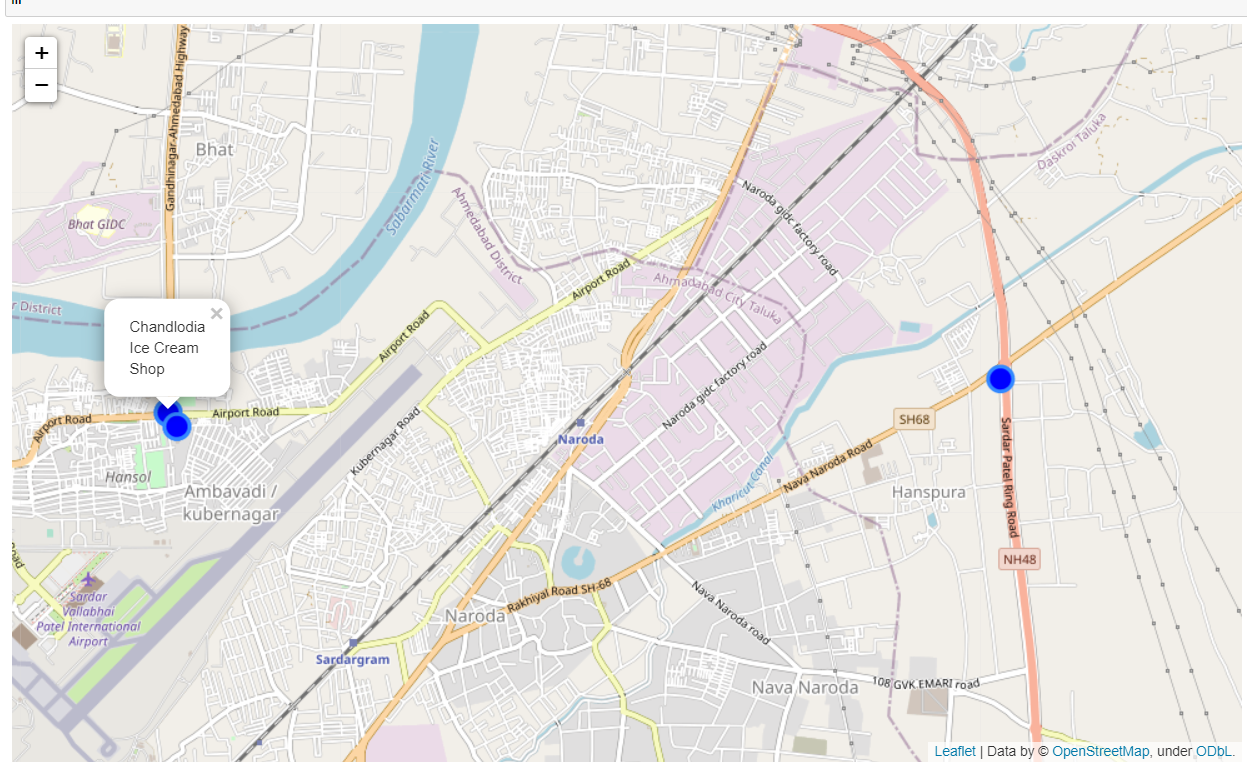

In [55]:
filename = "Screenshot (600).png"
image = Image.open(filename)
image

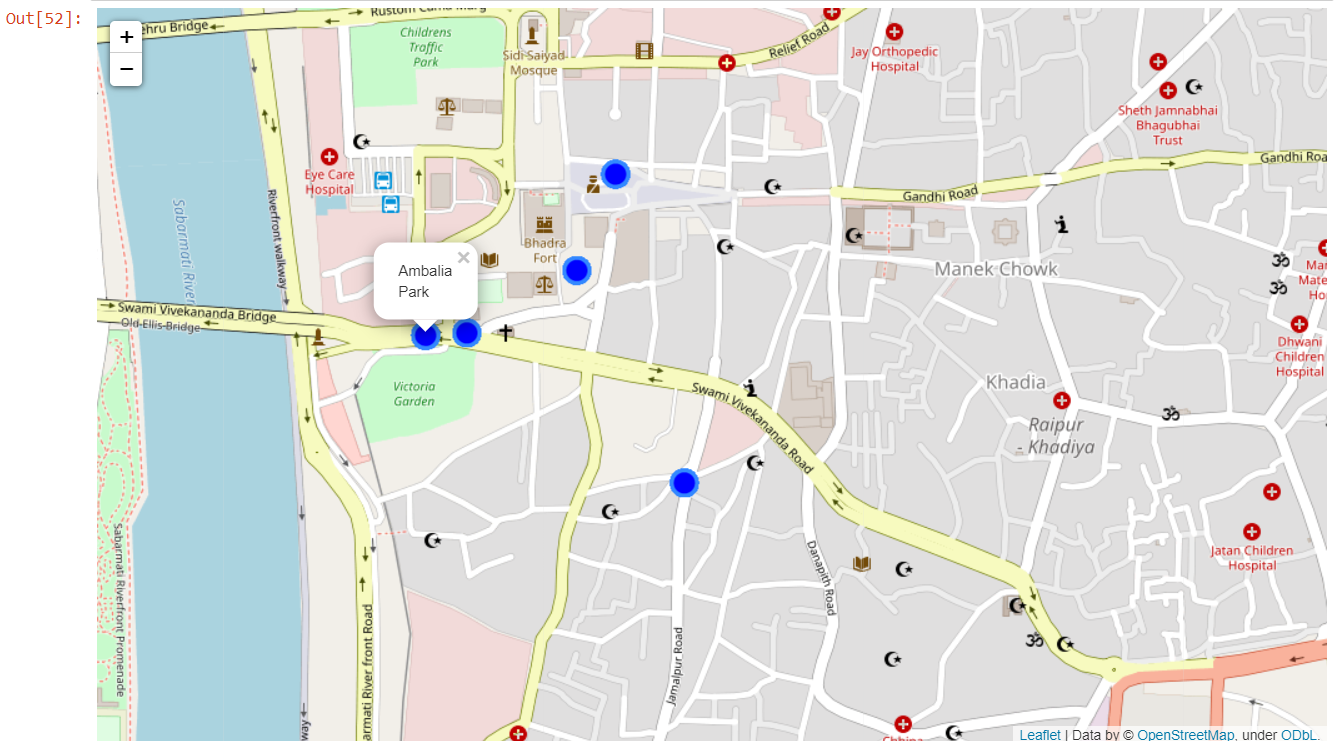

In [56]:
filename = "Screenshot (599).png"
image = Image.open(filename)
image

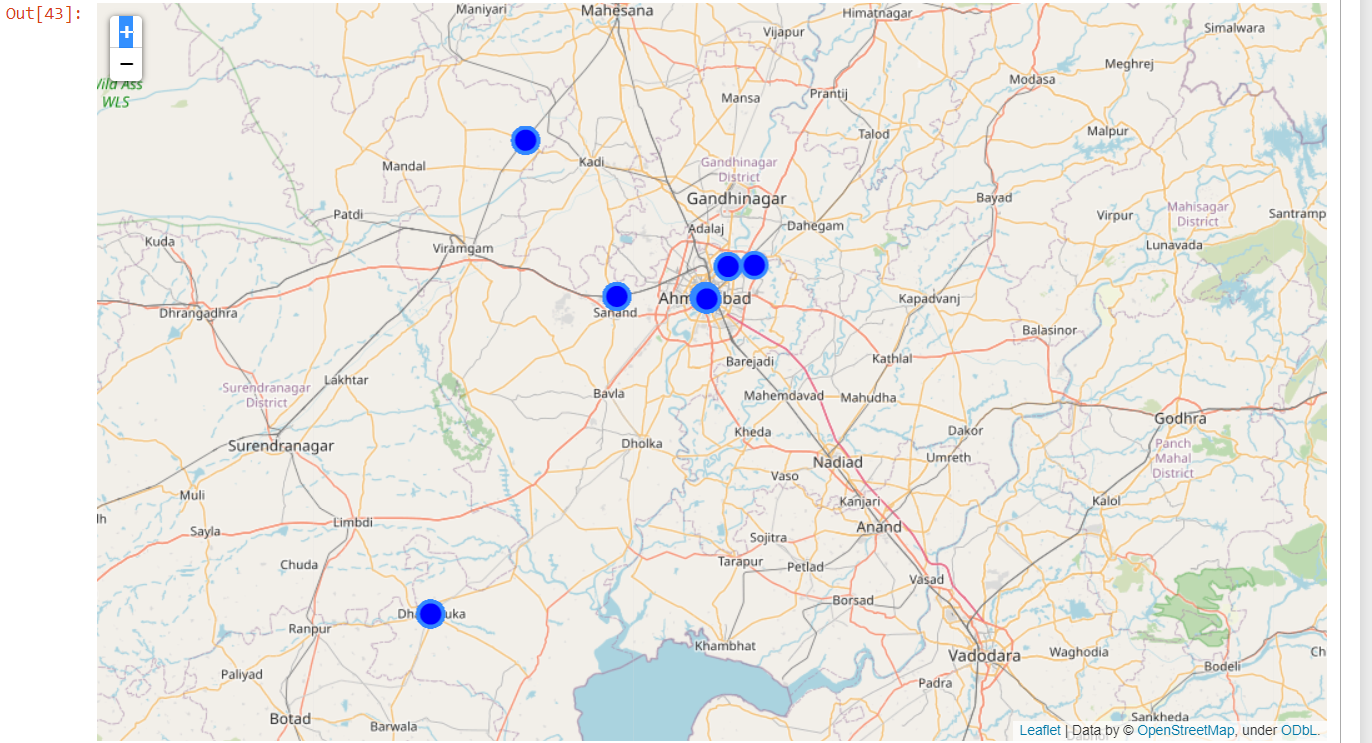

In [57]:
filename = "Screenshot (598).png"
image = Image.open(filename)
image